In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Import and Preview

Check the head(), size, and variables that are in the dataset

In [2]:
df = pd.read_csv("listings.csv",low_memory=False)

In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20200104042243,2020-01-04,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,...,f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20200104042243,2020-01-05,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,...,t,f,flexible,f,f,1,1,0,0,0.18
2,2708,https://www.airbnb.com/rooms/2708,20200104042243,2020-01-04,Mirrored Mini-Suite with Fireplace - W. Hollywood,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,0.34
3,2732,https://www.airbnb.com/rooms/2732,20200104042243,2020-01-04,Zen Life at the Beach,NaN,This is a three story townhouse with the follo...,This is a three story townhouse with the follo...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,0.20
4,2864,https://www.airbnb.com/rooms/2864,20200104042243,2020-01-04,*Upscale Professional Home with Beautiful Studio*,Centrally located.... Furnished with 42 inch S...,The space is furnished with Thomasville furnit...,Centrally located.... Furnished with 42 inch S...,none,What makes the neighborhood unique is that the...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN


In [4]:
df.shape

(39486, 106)

In [5]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

## Data Cleaning

After looking at the data and its columns, we can see that the url columns are not important for our study. Additionally, we don't have much information about the availability_ columns and we would not need the calculated columns as we will engineer our own based on the research question

In [6]:
columns_with_urls = [i for i in df.columns if i.endswith("_url")]
df.drop(columns_with_urls,axis=1, inplace=True)

In [7]:
availability_cols = [i for i in df.columns if i.startswith("availability_")]
df.drop(availability_cols,axis=1, inplace=True)

In [8]:
calculated_cols = [i for i in df.columns if i.startswith("calculated_host_listings_count_")]
df.drop(calculated_cols,axis=1, inplace=True)

In [9]:
other_cols = ['scrape_id', 'last_scraped','summary','host_name','host_location','host_about', 'host_response_time', \
               'host_neighbourhood','host_verifications', 'host_has_profile_pic','market','smart_location', \
               'country_code', 'country', 'latitude', 'longitude','is_location_exact','cleaning_fee',\
               'is_business_travel_ready','calendar_updated','calendar_last_scraped','requires_license','license',\
              'jurisdiction_names','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',\
              'maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','number_of_reviews_ltm',\
               'require_guest_profile_picture','require_guest_phone_verification']
df.drop(other_cols, axis=1,inplace=True)

#### Change none and N/A values to NULL and make sure there are no duplicates by listing id

In [10]:
df = df.apply(lambda x: x.replace("none",np.nan).replace("N/A",np.nan))

In [11]:
df.drop_duplicates(subset=['id'],inplace=True)

### Handling Missing Values

1. With missing values, we will drop COLUMNS based on null value percentage of more than 90%
2. For those that have a small percentage of missing values (<1%), we will drop the ROWS

In [12]:
null_perc = pd.DataFrame(df.isnull().sum()/len(df))

In [13]:
#drop columns based on null value percentage
df.drop([x for x,y in zip(null_perc.index,null_perc.iloc[:,0].values) if y >=.90],axis=1,inplace=True)

In [14]:
#drop the rows where the null percentage is really small (less than 1%)
null_perc = pd.DataFrame(df.isnull().sum()/len(df))
df.dropna(subset=[x for x,y in zip(null_perc.index,null_perc.iloc[:,0].values) if y <0.01 and y!=0],inplace=True)

In [15]:
df.isnull().sum()/len(df)

id                                0.000000
name                              0.000000
space                             0.257200
description                       0.034523
neighborhood_overview             0.335011
notes                             0.502798
transit                           0.389390
access                            0.420796
interaction                       0.362380
house_rules                       0.305164
host_id                           0.000000
host_since                        0.000000
host_response_rate                0.192063
host_is_superhost                 0.000000
host_listings_count               0.000000
host_total_listings_count         0.000000
host_identity_verified            0.000000
street                            0.000000
neighbourhood                     0.085120
neighbourhood_cleansed            0.000000
neighbourhood_group_cleansed      0.000000
city                              0.000000
state                             0.000000
zipcode    

Review scores can vary greatly and it might be assuming too much if we take in other variables to manipulate this field; since it's a very important aspect to our dataset, and since we sufficient number of data, we will drop these ROWS.

In [16]:
df.dropna(subset=[col for col in df.columns if col.startswith("review_scores_")],inplace=True)

In [17]:
df.isnull().sum()/len(df)

id                                0.000000
name                              0.000000
space                             0.209561
description                       0.019997
neighborhood_overview             0.281867
notes                             0.440577
transit                           0.327111
access                            0.345811
interaction                       0.308767
house_rules                       0.256976
host_id                           0.000000
host_since                        0.000000
host_response_rate                0.141695
host_is_superhost                 0.000000
host_listings_count               0.000000
host_total_listings_count         0.000000
host_identity_verified            0.000000
street                            0.000000
neighbourhood                     0.062551
neighbourhood_cleansed            0.000000
neighbourhood_group_cleansed      0.000000
city                              0.000000
state                             0.000000
zipcode    

We can see from the initial preview of our dataset that neighborhood overview, notes, transit and access are all text fields. Let's look at interaction and house rules if they are categorical in nature.

In [18]:
df["interaction"].head()

0                                                  NaN
1    Host and caretaker may be available throughout...
2    I am friendly and available to help you with y...
3                                                  NaN
5    Helene is managing our Home while we are in Ge...
Name: interaction, dtype: object

In [19]:
df["house_rules"].head()

0    Camelot NEW RESIDENTS’ GENERAL INFORMATION   F...
1    Host asks that guests refrain from partying lo...
2    I just have one rule. The Golden Rule Do unto ...
3    ABOUT YOU.  Friendly travelers or people comin...
5    - Please  agree to the following house rules  ...
Name: house_rules, dtype: object

Since the neighborhood overview, notes, transit, access, interaction and house_rules are text fields, it would not make sense to try and populate so we will drop these columns. Additionally, for the reviews_per month, first and last_review, we can drop these ROWS as it would not be used for the analysis. Finally,for neighborhood, neighborhood cleansed nad neighborhood group cleansed, they are information that says the same thing so I decided to leave neigborhood cleansed and drop the other two.

In [20]:
df.drop(["neighborhood_overview","notes","transit","access","interaction","house_rules"],axis=1,inplace=True)
df.dropna(subset=["reviews_per_month","first_review","last_review"],inplace=True)
df.drop(["neighbourhood","neighbourhood_group_cleansed"],axis=1,inplace=True)

For description and space, let's try to see if the null rows of description can be populated by the space as we saw in the preview dataset above that they have similarities

In [21]:
df[df["description"].isnull()==True]["space"].value_counts()

Series([], Name: space, dtype: int64)

Since there is no way to populate description as well, we will drop space column and remove the rows where description was null.

In [22]:
df.drop("space",axis=1,inplace=True)
df.dropna(subset=["description"],inplace=True)

Let's check if we can populate the host_response_rate by checking if the host_id has other listings that have the host_response_rate information

In [23]:
hosts = df[df["host_response_rate"].isnull()==False].drop_duplicates()["host_id"].to_list()

In [24]:
df[(df["host_response_rate"].isnull()==True) & (df["host_id"].isin(hosts))]

,id,name,description,host_id,host_since,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month


Since we can see that there are no rows, we can't populate this as well and we will drop the ROWS where these are null.

In [25]:
df.dropna(subset=["host_response_rate"],inplace=True)

If any of the columns are string, let's make all of them in lowercase format.

In [26]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: x.lower() if isinstance(x, str)==True else x)

Let's check the datatypes of our remaining columns.

In [27]:
df.dtypes

id                                  int64
name                               object
description                        object
host_id                             int64
host_since                         object
host_response_rate                 object
host_is_superhost                  object
host_listings_count               float64
host_total_listings_count         float64
host_identity_verified             object
street                             object
neighbourhood_cleansed             object
city                               object
state                              object
zipcode                            object
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
bed_type                           object
amenities                          object
price                             

As we can see, the response rate is in object format. Let's see the value_counts to see how the rates are currently written.

In [28]:
df["host_response_rate"].value_counts()

100%    18964
90%      1037
99%       723
98%       621
97%       506
        ...  
13%         1
23%         1
14%         1
6%          1
19%         1
Name: host_response_rate, Length: 68, dtype: int64

Let's change the format by first taking out the % sign, changing this to a numeric data format and dividing it by 100 (as per rate)

In [29]:
#take out the % sign and divide by 100
df["host_response_rate"] = df["host_response_rate"].apply(lambda x: float(x[:-1])/100)

Similarly, we will remove the dollar sign and commas and change the price and extra_people to float, and check if there are any rows that have 0 as price and remove these from our dataset.

In [30]:
#remove dollar sign and commas and change to float
df["price"] = df["price"].apply(lambda x: float(x.replace("$","").replace(",","")))

In [31]:
#check
df[df["price"]<=0]["price"]

12901    0.0
15609    0.0
23872    0.0
Name: price, dtype: float64

In [32]:
df = df[df["price"]>0]

In [33]:
df["extra_people"].value_counts()

$0.00      10346
$10.00      2776
$25.00      2508
$20.00      2407
$15.00      1849
           ...  
$190.00        1
$68.00         1
$79.00         1
$188.00        1
$31.00         1
Name: extra_people, Length: 87, dtype: int64

In [34]:
#do the same for extra_people; remove dollar sign and commas and change to float
df["extra_people"] = df["extra_people"].apply(lambda x: float(x.replace("$","").replace(",","")))

## Feature Engineering

Before creating features, let's set the assumptions for our dataset:
1.	Each booking always has two guests unless the listing only accommodates one
2.	Only half of the stays generate a review, so we assume that the listing has twice as much bookings as the number of reviews.
3.	Because we don’t have the actual number of days stayed, we will take the minimum number of days allowed as the booking length.
4.	The price indicated is price for a one night stay, and the additional price is added if a solo traveler books an accommodation that can accommodate more than 1

Let's create a function that estimates the daily revenue as per the assumptions that we have for our data.

In [35]:
def getEDR(x):
    if x["guests_included"] == 1:
        if x["accommodates"]==1:
            daily_rev = x["price"]
        else:
            daily_rev = x["price"] + x["extra_people"]
    elif x["guests_included"] > 1:
        daily_rev = x["price"]
    else:
        return np.nan
    
    return daily_rev

In [36]:
#apply estimated daily revenue function
df["estimated_daily_revenue"] = df.apply(getEDR, axis=1)

In [37]:
df["estimated_daily_revenue"].isnull().sum()

0

In [38]:
#create estimated total revenue by multiplying this with the minimum nights of the listings
df["estimated_total_revenue"] = df["estimated_daily_revenue"] * df["minimum_nights"]

## Exploratory Data Analysis

We will be splitting our data analysis into three sections: revenue, review and popularity. With every section, we will explore the top hosts, property types and neighborhoods. We will also look at the distribution of the daily and total revenue.

In [39]:
df["estimated_daily_revenue"].describe()

count    25933.000000
mean       179.271970
std        319.601556
min         10.000000
25%         75.000000
50%        115.000000
75%        185.000000
max      10000.000000
Name: estimated_daily_revenue, dtype: float64

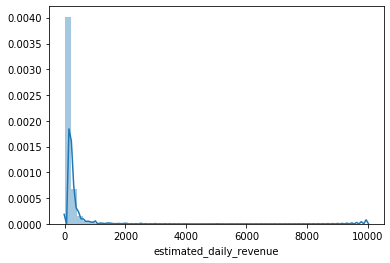

In [40]:
sns.distplot(df["estimated_daily_revenue"])

In [41]:
df["estimated_total_revenue"].describe()

count     25933.000000
mean       1567.077083
std        4113.486648
min          10.000000
25%         126.000000
50%         305.000000
75%        1800.000000
max      198560.000000
Name: estimated_total_revenue, dtype: float64

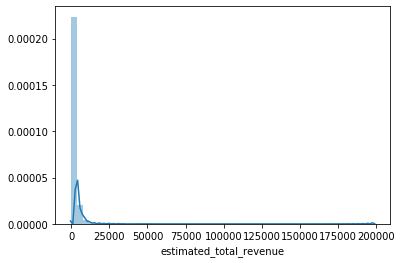

In [42]:
sns.distplot(df["estimated_total_revenue"])

In [43]:
#remove those that did not have a booking in determining the total estimated revenue -- guests included == 0
df_bookings = df[df.guests_included>0]

In [44]:
df_bookings["bookings"] = 2*df_bookings["number_of_reviews"]

In [45]:
host_etr = df_bookings.groupby("host_id")[["estimated_total_revenue"]].sum().\
sort_values(by="estimated_total_revenue",ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

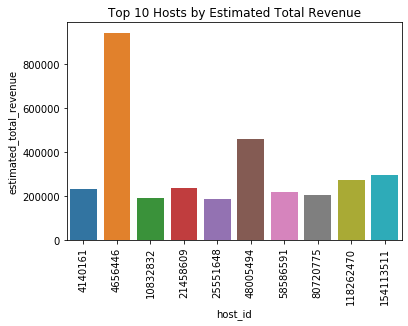

In [46]:
g = sns.barplot(x=host_etr.index,y=host_etr["estimated_total_revenue"])
g.set_title('Top 10 Hosts by Estimated Total Revenue')
plt.xticks(rotation=90)

In [48]:
host_bookings = df_bookings.groupby("host_id")[["bookings"]].sum().\
sort_values(by="bookings",ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

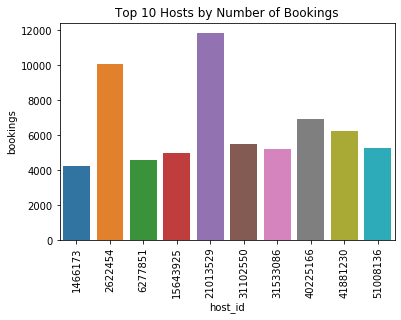

In [49]:
g = sns.barplot(x=host_bookings.index,y=host_bookings["bookings"])
g.set_title('Top 10 Hosts by Number of Bookings')
plt.xticks(rotation=90)

In [52]:
#which hosts have is in both lists
[host for host in host_etr.index if host in host_bookings.index]
#host_etr.index host_listings["host_id"]

[]

In [53]:
hosts_review = df_bookings.groupby("host_id")[["review_scores_rating"]].mean().\
sort_values(by="review_scores_rating",ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

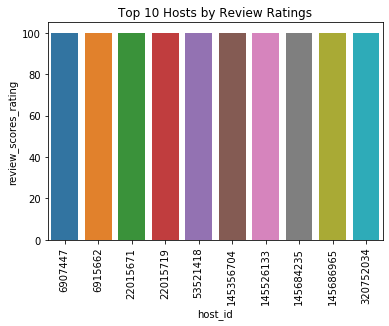

In [54]:
g = sns.barplot(x=hosts_review.index,y=hosts_review["review_scores_rating"])
g.set_title('Top 10 Hosts by Review Ratings')
plt.xticks(rotation=90)

In [55]:
property_etr = df_bookings.groupby("property_type")[["estimated_total_revenue"]].sum().\
sort_values(by="estimated_total_revenue",ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

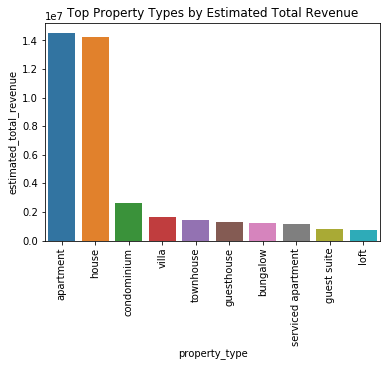

In [56]:
g = sns.barplot(x=property_etr.index,y=property_etr["estimated_total_revenue"])
g.set_title('Top Property Types by Estimated Total Revenue')
plt.xticks(rotation=90)

In [57]:
property_listings = df_bookings.groupby("property_type")[["bookings"]].sum().sort_values(by="bookings",ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

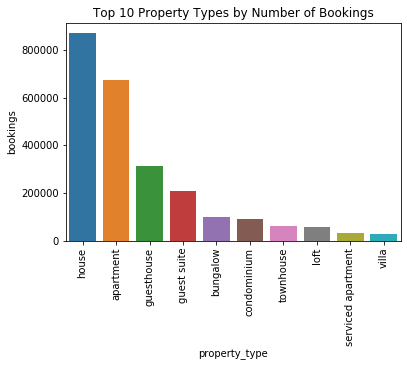

In [58]:
g = sns.barplot(x=property_listings.index,y=property_listings["bookings"])
g.set_title('Top 10 Property Types by Number of Bookings')
plt.xticks(rotation=90)

In [59]:
property_review = df_bookings.groupby("property_type")[["review_scores_rating"]].mean().\
sort_values(by="review_scores_rating",ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

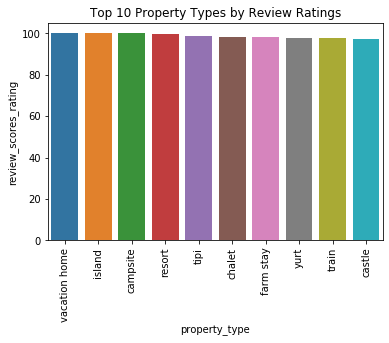

In [60]:
g = sns.barplot(x=property_review.index,y=property_review["review_scores_rating"])
g.set_title('Top 10 Property Types by Review Ratings')
plt.xticks(rotation=90)

In [61]:
neighborhood_etr = df_bookings.groupby("neighbourhood_cleansed")[["estimated_total_revenue"]].sum().sort_values(by="estimated_total_revenue",ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

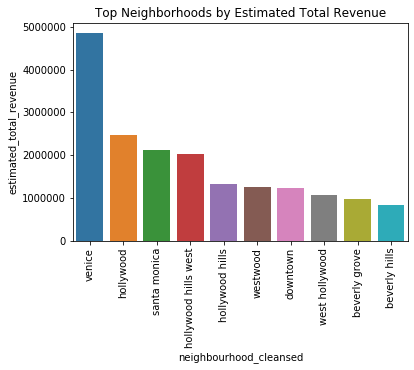

In [62]:
g = sns.barplot(x=neighborhood_etr.index,y=neighborhood_etr["estimated_total_revenue"])
g.set_title('Top Neighborhoods by Estimated Total Revenue')
plt.xticks(rotation=90)

In [63]:
neighborhood_bookings = df_bookings.groupby("neighbourhood_cleansed")[["bookings"]].\
sum().sort_values(by="bookings",ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

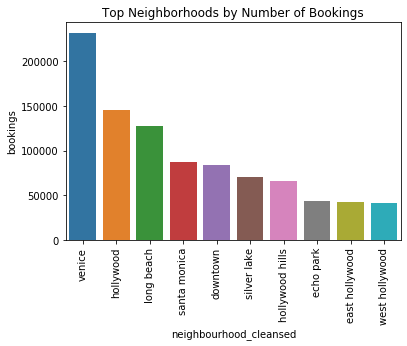

In [64]:
g = sns.barplot(x=neighborhood_bookings.index,y=neighborhood_bookings["bookings"])
g.set_title('Top Neighborhoods by Number of Bookings')
plt.xticks(rotation=90)

In [65]:
neighborhood_review = df_bookings.groupby("neighbourhood_cleansed")[["review_scores_rating"]].mean().\
sort_values(by="review_scores_rating",ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

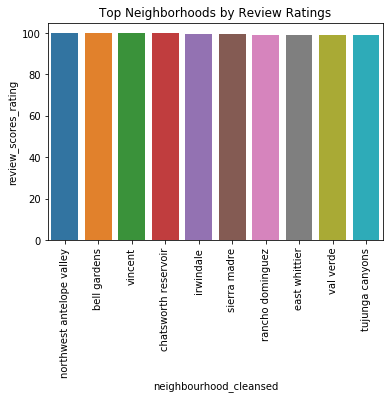

In [66]:
g = sns.barplot(x=neighborhood_review.index,y=neighborhood_review["review_scores_rating"])
g.set_title('Top Neighborhoods by Review Ratings')
plt.xticks(rotation=90)

In [ ]:
# Top Hosts Analysis

In [70]:
host_1 = df_bookings[df_bookings["host_id"]==4656446]\
.sort_values(by="estimated_total_revenue",ascending=False)

In [82]:
host_1.groupby("property_type")["bookings"].sum().sort_values(ascending=False)

property_type
house          2300
apartment       220
townhouse        44
condominium      44
guest suite      28
Name: bookings, dtype: int64

In [81]:
host_1.groupby("property_type")["estimated_total_revenue"].sum().sort_values(ascending=False)

property_type
house          899206.0
apartment       20708.0
condominium      8556.0
townhouse        7657.0
guest suite      5145.0
Name: estimated_total_revenue, dtype: float64

In [87]:
host_1.groupby("property_type")["review_scores_rating"].mean().sort_values(ascending=False)

property_type
townhouse      99.000000
guest suite    99.000000
condominium    97.000000
apartment      96.000000
house          95.846154
Name: review_scores_rating, dtype: float64

In [79]:
host_1.groupby("neighbourhood_cleansed")["bookings"].sum().sort_values(ascending=False)

neighbourhood_cleansed
venice                  932
hollywood hills west    278
bel-air                 162
fairfax                 156
hollywood hills         154
highland park           146
beverly grove           134
echo park               126
pacific palisades       120
westwood                 80
mid-wilshire             60
long beach               56
west los angeles         48
playa vista              46
manhattan beach          42
glendale                 38
mount washington         30
malibu                   28
Name: bookings, dtype: int64

In [80]:
host_1.groupby("neighbourhood_cleansed")["estimated_total_revenue"].sum().sort_values(ascending=False)

neighbourhood_cleansed
hollywood hills west    546729.0
pacific palisades        91623.0
westwood                 79935.0
venice                   75159.0
fairfax                  38564.0
hollywood hills          35883.0
bel-air                  26249.0
beverly grove            15159.0
highland park             8463.0
playa vista               7781.0
malibu                    4503.0
echo park                 3305.0
west los angeles          3150.0
mount washington          3131.0
manhattan beach            598.0
glendale                   426.0
long beach                 384.0
mid-wilshire               230.0
Name: estimated_total_revenue, dtype: float64

In [88]:
host_1.groupby("neighbourhood_cleansed")["review_scores_rating"].mean().sort_values(ascending=False)

neighbourhood_cleansed
playa vista             100.000000
hollywood hills          98.714286
pacific palisades        98.500000
fairfax                  98.333333
glendale                 98.000000
highland park            98.000000
hollywood hills west     97.166667
mount washington         97.000000
beverly grove            97.000000
long beach               96.000000
venice                   95.454545
echo park                95.333333
manhattan beach          95.000000
westwood                 94.000000
bel-air                  91.333333
mid-wilshire             91.000000
malibu                   89.000000
west los angeles         87.000000
Name: review_scores_rating, dtype: float64

In [89]:
from wordcloud import WordCloud, STOPWORDS 

In [96]:
top_rev = df_bookings.groupby("host_id")[["estimated_total_revenue"]].sum().\
sort_values(by="estimated_total_revenue",ascending=False).head(10).merge(df_bookings[["host_id","description"]],\
                                                                        how="inner", left_index=True, right_on="host_id")

In [97]:
comment_words = '' 
stopwords = set(STOPWORDS)
for val in top_rev.description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

In [98]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

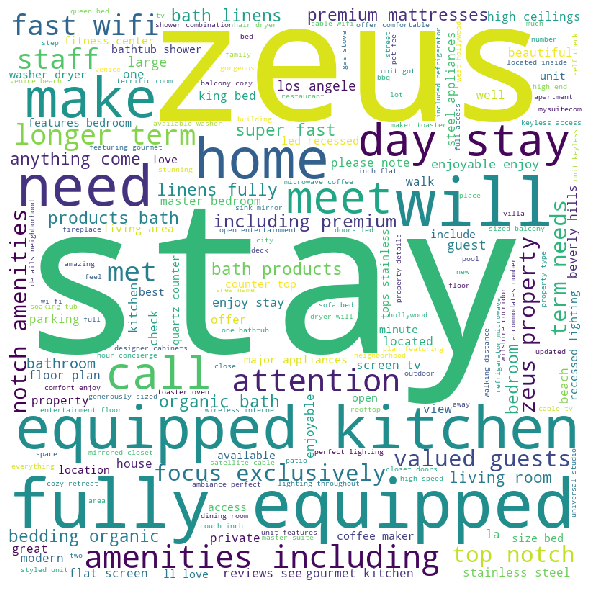

In [99]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 